## MODELADO CLASIFICACION NVICTIM_INTERV CON OVERSAMPLING (SMOTE)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Carga de los datos ya codificados categóricos

In [2]:
df_premodelo = pd.read_csv('./madrid_accidentes_modelar_NVICTIM_INTERV_v1_0.csv',encoding='latin1')

df_premodelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86817 entries, 0 to 86816
Data columns (total 23 columns):
MAL_TIEMPO                               86817 non-null int64
MAL_ESTADO_SUELO                         86817 non-null int64
num_vehic_implic                         86817 non-null int64
conductor_menor                          86817 non-null int64
conductor_18_34                          86817 non-null int64
conductor_35_49                          86817 non-null int64
conductor_50_mas                         86817 non-null int64
RANGO_HORARIO_DE 00:00 A 7:00            86817 non-null int64
RANGO_HORARIO_DE 12:00 A 17:00           86817 non-null int64
RANGO_HORARIO_DE 17:00 A 21:00           86817 non-null int64
RANGO_HORARIO_DE 21:00 A 00:00           86817 non-null int64
RANGO_HORARIO_DE 7:00 A 12:00            86817 non-null int64
DIA_SEMANA_FIN DE SEMANA                 86817 non-null int64
DIA_SEMANA_LABORABLE                     86817 non-null int64
TIPO_ACCIDENTE_ATROPELL

## SELECCION CARACTERISTICAS

Probaremos ranking importancia características y eliminación recursiva.

In [3]:
X = df_premodelo.drop(columns='NVICTIM_INTERV')

y = df_premodelo['NVICTIM_INTERV']

X.shape

(86817, 22)

### Importancia característica, modelo RF

In [4]:
from sklearn.ensemble import RandomForestClassifier

model_RF_ranking = RandomForestClassifier(n_estimators=500,random_state=42)

model_RF_ranking.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [5]:
ranking_RF = pd.Series(model_RF_ranking.feature_importances_,index=X.columns)

ranking_RF.sort_values(ascending=False)

num_vehic_implic                         0.213344
TIPO_ACCIDENTE_COLISION MULTIPLE         0.119474
conductor_18_34                          0.087695
conductor_35_49                          0.081014
TIPO_ACCIDENTE_CAIDA MOTOR_2_3_RUEDAS    0.068596
conductor_50_mas                         0.064594
TIPO_ACCIDENTE_COLISION DOBLE            0.052645
RANGO_HORARIO_DE 00:00 A 7:00            0.044811
MAL_ESTADO_SUELO                         0.035470
MAL_TIEMPO                               0.034006
TIPO_ACCIDENTE_ATROPELLO                 0.025405
RANGO_HORARIO_DE 7:00 A 12:00            0.021158
DIA_SEMANA_FIN DE SEMANA                 0.019492
RANGO_HORARIO_DE 12:00 A 17:00           0.018086
DIA_SEMANA_LABORABLE                     0.018073
TIPO_ACCIDENTE_CAIDA BICICLETA           0.017980
RANGO_HORARIO_DE 17:00 A 21:00           0.017827
RANGO_HORARIO_DE 21:00 A 00:00           0.016384
TIPO_ACCIDENTE_CHOQUE CON OBJETO FIJO    0.016109
conductor_menor                          0.013364


### RFE  (ELIMINACION RECURSIVA)

In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [7]:

model_RFE = RandomForestClassifier(random_state=42)
rfe = RFE(model_RFE, 18)

fit_RFE = rfe.fit(X, y)


In [8]:
ranking_RFE = pd.Series(X.columns.values, index=fit_RFE.ranking_)

ranking_RFE.sort_index()

1                               MAL_TIEMPO
1           TIPO_ACCIDENTE_CAIDA BICICLETA
1                 TIPO_ACCIDENTE_ATROPELLO
1                     DIA_SEMANA_LABORABLE
1                 DIA_SEMANA_FIN DE SEMANA
1            RANGO_HORARIO_DE 7:00 A 12:00
1         TIPO_ACCIDENTE_COLISION MULTIPLE
1           RANGO_HORARIO_DE 17:00 A 21:00
1           RANGO_HORARIO_DE 12:00 A 17:00
1            RANGO_HORARIO_DE 00:00 A 7:00
1                         conductor_50_mas
1                          conductor_35_49
1                          conductor_18_34
1            TIPO_ACCIDENTE_COLISION DOBLE
1                         num_vehic_implic
1                         MAL_ESTADO_SUELO
1    TIPO_ACCIDENTE_CAIDA MOTOR_2_3_RUEDAS
1    TIPO_ACCIDENTE_CHOQUE CON OBJETO FIJO
2           RANGO_HORARIO_DE 21:00 A 00:00
3                          conductor_menor
4              TIPO_ACCIDENTE_VUELCO_OTROS
5         TIPO_ACCIDENTE_CAIDA VIAJERO BUS
dtype: object

### Tabla resumen seleccion caracteristicas.

In [9]:
tabla_ranking = pd.DataFrame({'RF_importance': ranking_RF.sort_values(ascending=False).index, \
                             'orden_RFE': ranking_RFE.sort_index().index, 'atributo_RFE': ranking_RFE.sort_index().values})

tabla_ranking

,RF_importance,orden_RFE,atributo_RFE
0,num_vehic_implic,1,MAL_TIEMPO
1,TIPO_ACCIDENTE_COLISION MULTIPLE,1,TIPO_ACCIDENTE_CAIDA BICICLETA
2,conductor_18_34,1,TIPO_ACCIDENTE_ATROPELLO
3,conductor_35_49,1,DIA_SEMANA_LABORABLE
4,TIPO_ACCIDENTE_CAIDA MOTOR_2_3_RUEDAS,1,DIA_SEMANA_FIN DE SEMANA
5,conductor_50_mas,1,RANGO_HORARIO_DE 7:00 A 12:00
6,TIPO_ACCIDENTE_COLISION DOBLE,1,TIPO_ACCIDENTE_COLISION MULTIPLE
7,RANGO_HORARIO_DE 00:00 A 7:00,1,RANGO_HORARIO_DE 17:00 A 21:00
8,MAL_ESTADO_SUELO,1,RANGO_HORARIO_DE 12:00 A 17:00
9,MAL_TIEMPO,1,RANGO_HORARIO_DE 00:00 A 7:00


Nos quedamos con las de RFE

In [10]:
X.drop(columns=['RANGO_HORARIO_DE 21:00 A 00:00','conductor_menor', \
                'TIPO_ACCIDENTE_CAIDA VIAJERO BUS','TIPO_ACCIDENTE_VUELCO_OTROS'], inplace=True)



# 'MAL_ESTADO_SUELO','MAL_TIEMPO', \
# 'conductor_35_49', 'conductor_50_mas',
#  'TIPO_ACCIDENTE_ATROPELLO', \'TIPO_ACCIDENTE_CAIDA BICICLETA','TIPO_ACCIDENTE_CHOQUE CON OBJETO FIJO', \
# 'RANGO_HORARIO_DE 7:00 A 12:00','RANGO_HORARIO_DE 12:00 A 17:00','RANGO_HORARIO_DE 17:00 A 21:00'
# 'DIA_SEMANA_FIN DE SEMANA','DIA_SEMANA_LABORABLE', \

X.shape

(86817, 18)

In [11]:
X.columns

Index(['MAL_TIEMPO', 'MAL_ESTADO_SUELO', 'num_vehic_implic', 'conductor_18_34',
       'conductor_35_49', 'conductor_50_mas', 'RANGO_HORARIO_DE 00:00 A 7:00',
       'RANGO_HORARIO_DE 12:00 A 17:00', 'RANGO_HORARIO_DE 17:00 A 21:00',
       'RANGO_HORARIO_DE 7:00 A 12:00', 'DIA_SEMANA_FIN DE SEMANA',
       'DIA_SEMANA_LABORABLE', 'TIPO_ACCIDENTE_ATROPELLO',
       'TIPO_ACCIDENTE_CAIDA BICICLETA',
       'TIPO_ACCIDENTE_CAIDA MOTOR_2_3_RUEDAS',
       'TIPO_ACCIDENTE_CHOQUE CON OBJETO FIJO',
       'TIPO_ACCIDENTE_COLISION DOBLE', 'TIPO_ACCIDENTE_COLISION MULTIPLE'],
      dtype='object')

### SEPARACIÓN CONJUNTOS TRAIN Y TEST ESTRATIFICADO

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

train_test_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in train_test_split.split(X, y):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    
    y_train, y_test = y[train_index], y[test_index]

In [13]:
y_train.value_counts(normalize=True)

LEVE           0.804561
MEDIA/GRAVE    0.195439
Name: NVICTIM_INTERV, dtype: float64

In [14]:
y_test.value_counts(normalize=True)

LEVE           0.804538
MEDIA/GRAVE    0.195462
Name: NVICTIM_INTERV, dtype: float64

## Comunes a todos los modelos

In [15]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score 

num_folds = 10
skf = StratifiedKFold(n_splits=num_folds)

scoring = 'roc_auc'
#'f1_macro' 'roc_auc'

## IMBALANCED LEARNING

Explicar que los malos resultados se deben al target desbalanceado, cuesta detectar el minoritario y que es necesario tecnicads de resampling

### SMOTE

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42, n_jobs=-1)

X_train_rsmpl, y_train_rsmpl = smote.fit_sample(X_train, y_train)

X_train_rsmpl.shape, y_train_rsmpl.shape

((97788, 18), (97788,))

In [17]:
# TARGET DESBALANCEADO
y_train.value_counts()

LEVE           48894
MEDIA/GRAVE    11877
Name: NVICTIM_INTERV, dtype: int64

In [18]:
# TARGET BALANCEADO DESPUES DE SMOTE
y_train_rsmpl.value_counts()

LEVE           48894
MEDIA/GRAVE    48894
Name: NVICTIM_INTERV, dtype: int64

## Decision Trees

In [19]:
from sklearn.tree import DecisionTreeClassifier

modelo_DesTree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

resultadosDesTree = cross_val_score(modelo_DesTree, X_train_rsmpl, y_train_rsmpl, cv=skf, scoring=scoring)

print('DECISION TREE:\n')
print('Media:',resultadosDesTree.mean(),' Desviación:',resultadosDesTree.std())



DECISION TREE:

Media: 0.7114575061440143  Desviación: 0.011462930708697942


In [20]:

modelo_DesTree.fit(X_train_rsmpl, y_train_rsmpl)

y_preds = modelo_DesTree.predict(X_test)

report = classification_report(y_test, y_preds)
print('Classification Report DECISION TREE: \n', report)


Classification Report DECISION TREE: 
               precision    recall  f1-score   support

        LEVE       0.86      0.63      0.73     20955
 MEDIA/GRAVE       0.28      0.59      0.38      5091

    accuracy                           0.62     26046
   macro avg       0.57      0.61      0.55     26046
weighted avg       0.75      0.62      0.66     26046



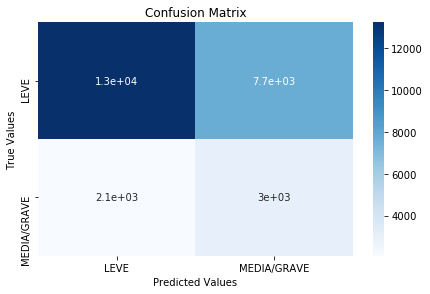

In [21]:
# matriz confusion
mat_conf = confusion_matrix(y_test, y_preds)

# dataframe auxiliar para crear grafico
dataframe = pd.DataFrame(mat_conf, index=['LEVE', 'MEDIA/GRAVE'], columns=['LEVE', 'MEDIA/GRAVE'])

# crear heatmap
sns.heatmap(dataframe, annot=True, cbar=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

## Random Forest

In [22]:
n_trees = 300
modelo_RF = RandomForestClassifier(n_estimators=n_trees, n_jobs=-1, random_state=42, class_weight='balanced')

resultadosRF = cross_val_score(modelo_RF, X_train_rsmpl, y_train_rsmpl, cv=skf, scoring=scoring)

print('Random Forest:\n')
print('Media:',resultadosRF.mean(),' Desviación:',resultadosRF.std())


Random Forest:

Media: 0.7140703328672962  Desviación: 0.010446370027107778


In [23]:

modelo_RF.fit(X_train_rsmpl, y_train_rsmpl)

y_preds = modelo_RF.predict(X_test)

report = classification_report(y_test, y_preds)
print('Classification Report Random Forest: \n', report)


Classification Report Random Forest: 
               precision    recall  f1-score   support

        LEVE       0.86      0.63      0.73     20955
 MEDIA/GRAVE       0.28      0.60      0.38      5091

    accuracy                           0.62     26046
   macro avg       0.57      0.61      0.55     26046
weighted avg       0.75      0.62      0.66     26046



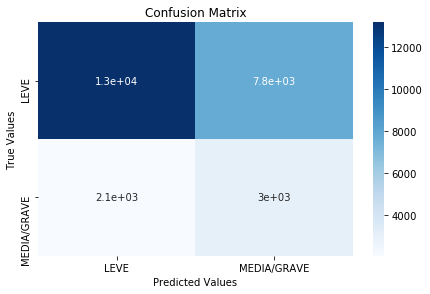

In [24]:
# matriz de confusion
mat_conf = confusion_matrix(y_test, y_preds)

# dataframe auxiliar para grafico
dataframe = pd.DataFrame(mat_conf, index=['LEVE', 'MEDIA/GRAVE'], columns=['LEVE', 'MEDIA/GRAVE'])

# crear heatmap
sns.heatmap(dataframe, annot=True, cbar=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

## GradientBoostingClassifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

num_trees = 300
modelo_GBC = GradientBoostingClassifier(n_estimators=num_trees, random_state=42)

resultadosGBC = cross_val_score(modelo_GBC, X_train_rsmpl, y_train_rsmpl, cv=skf, scoring=scoring)

print('GRADIENT BOOST CLASSIFIER:\n')
print('Media:',resultadosGBC.mean(),' Desviación:',resultadosGBC.std())



GRADIENT BOOST CLASSIFIER:

Media: 0.6995572695279719  Desviación: 0.005073217769406771


In [26]:

modelo_GBC.fit(X_train_rsmpl, y_train_rsmpl)

y_preds = modelo_GBC.predict(X_test)

report = classification_report(y_test, y_preds)
print('Classification Report GRADIENT BOOST CLASSIFIER: \n', report)


Classification Report GRADIENT BOOST CLASSIFIER: 
               precision    recall  f1-score   support

        LEVE       0.88      0.58      0.70     20955
 MEDIA/GRAVE       0.28      0.69      0.40      5091

    accuracy                           0.60     26046
   macro avg       0.58      0.63      0.55     26046
weighted avg       0.77      0.60      0.64     26046



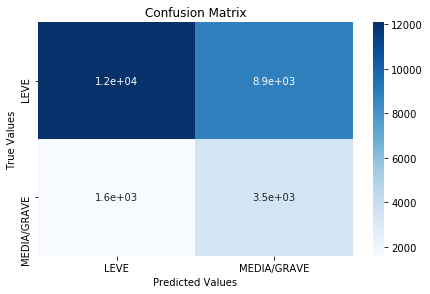

In [27]:
# matriz de confusión
mat_conf = confusion_matrix(y_test, y_preds)

# dataframe auxiliar para crear grafico
dataframe = pd.DataFrame(mat_conf, index=['LEVE', 'MEDIA/GRAVE'], columns=['LEVE', 'MEDIA/GRAVE'])

# crear heatmap
sns.heatmap(dataframe, annot=True, cbar=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

## PROBAR POSIBILIDAD DE REFINAR SMOTE especificando tasa oversampling (sampling_strategy)

In [28]:
modelos = []

modelos.append(('RF',RandomForestClassifier(n_estimators=n_trees, n_jobs=-1, random_state=42, class_weight='balanced')))
modelos.append(('DECS_TREE', DecisionTreeClassifier(class_weight='balanced', random_state=42)))
modelos.append(('GRAD_BOOST_CLASS', GradientBoostingClassifier(n_estimators=num_trees, random_state=42)))


In [29]:
sampling_strategy = list(np.arange(0.3,1,0.1))
sampling_strategy

[0.3,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000002,
 0.8000000000000003,
 0.9000000000000001]

In [30]:
num_trees = 300

for ratio in sampling_strategy:
    
    smote = SMOTE(sampling_strategy=ratio, random_state=42, n_jobs=-1)
    X_train_rsmpl, y_train_rsmpl = smote.fit_sample(X_train, y_train)
    
    print('ESTRATEGIA:',ratio,'\n')
    
    for nombre, modelo in modelos:
                
        model = modelo
        
        resultados = cross_val_score(model, X_train_rsmpl, y_train_rsmpl, cv=skf, scoring=scoring)
        
        print(nombre,':\n')
        print('Media:',resultados.mean(),' Desviación:',resultados.std(),'\n')
        
    print('----------'*6,'\n')


    

ESTRATEGIA: 0.3 

RF :

Media: 0.681065343161837  Desviación: 0.01711309588749027 

DECS_TREE :

Media: 0.6770521197286492  Desviación: 0.017538555202612233 

GRAD_BOOST_CLASS :

Media: 0.6912427321619925  Desviación: 0.006486527643854345 

------------------------------------------------------------ 

ESTRATEGIA: 0.4 

RF :

Media: 0.6934167609165786  Desviación: 0.018853770434186817 

DECS_TREE :

Media: 0.6893917537868798  Desviación: 0.019645189012669022 

GRAD_BOOST_CLASS :

Media: 0.6940568859228887  Desviación: 0.007487704283572455 

------------------------------------------------------------ 

ESTRATEGIA: 0.5 

RF :

Media: 0.700215354498961  Desviación: 0.016195239203786543 

DECS_TREE :

Media: 0.6968188810960501  Desviación: 0.01762006433796069 

GRAD_BOOST_CLASS :

Media: 0.694872790536886  Desviación: 0.006045590372162375 

------------------------------------------------------------ 

ESTRATEGIA: 0.6000000000000001 

RF :

Media: 0.7045960139897585  Desviación: 0.0139556

# TUNNING DEL MODELO, HIPERPARÁMETROS

## Partimos del mejor caso, SMOTE con sampling_strategy=minority y 18 atributos

In [31]:
smote = SMOTE(sampling_strategy='minority', random_state=42, n_jobs=-1)

X_train_rsmpl, y_train_rsmpl = smote.fit_sample(X_train, y_train)

X_train_rsmpl.shape, y_train_rsmpl.shape

((97788, 18), (97788,))

## Prueba por fases de hiperparámetros

## n_estimators and Learning rate

In [33]:
from sklearn.model_selection import GridSearchCV

p_test1 = {'learning_rate':[0.1,0.08,0.06,0.04,0.02,0.01], 'n_estimators':[40,60,80,100,300,500,800]}

tuning = GridSearchCV(estimator=GradientBoostingClassifier(max_depth=4,max_features='sqrt',random_state=42), \
                      param_grid = p_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)

tuning.fit(X_train_rsmpl,y_train_rsmpl)

print('Parametros:',tuning.best_params_)
print('AUC:',tuning.best_score_)






C:\Users\edurp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Parametros: {'learning_rate': 0.1, 'n_estimators': 800}
AUC: 0.7048861728042566


## max_depth

In [36]:
p_test2 = {'max_depth':[2,3,4,5,6,7]}

tuning = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,n_estimators=800,max_depth=4,max_features='sqrt', \
                                                           random_state=42), \
                      param_grid = p_test2, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)

tuning.fit(X_train_rsmpl,y_train_rsmpl)

print('Parametros:',tuning.best_params_)
print('AUC:',tuning.best_score_)



C:\Users\edurp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Parametros: {'max_depth': 7}
AUC: 0.7115717462706617


#### el óptimo es el valor máximo del rango que le suministramos, probamos con valores mayores

In [37]:
p_test2_b = {'max_depth':[7,8,9,10]}

tuning = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,n_estimators=800,max_depth=4,max_features='sqrt', \
                                                           random_state=42), \
                      param_grid = p_test2_b, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)

tuning.fit(X_train_rsmpl,y_train_rsmpl)

print('Parametros:',tuning.best_params_)
print('AUC:',tuning.best_score_)

C:\Users\edurp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Parametros: {'max_depth': 10}
AUC: 0.7128159578542752


La mejora no justifica el aumento de complejidad del modelo, nos quedamos con 7

## Min samples leaf y max_features

In [42]:
p_test3 = {'min_samples_leaf':[1,3,5,7,9],'max_features':[2,3,5,8]}

tuning = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,n_estimators=800,max_depth=7,random_state=42), \
                      param_grid = p_test3, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)

tuning.fit(X_train_rsmpl,y_train_rsmpl)

print('Parametros:',tuning.best_params_)
print('AUC:',tuning.best_score_)

C:\Users\edurp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Parametros: {'max_features': 8, 'min_samples_leaf': 1}
AUC: 0.7115794424877807


## ENTRENAR Y GUARDAR EL MODELO TUNEADO (VALORES HIPERPARÁMETROS CONSEGUIDOS FASE ANTERIOR)

In [45]:
modelo_final = GradientBoostingClassifier(learning_rate=0.1,n_estimators=800,max_depth=7, \
                                          min_samples_leaf=1,max_features=None,random_state=42)

In [48]:
modelo_final.fit(X_train_rsmpl,y_train_rsmpl)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=800,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### GUARDAR MODELO FINAL

In [ ]:
from sklearn.externals.joblib import dump, load

#from sklearn.externals.joblib import load

# Guardamos el modelo al disco

fichero_modelo_final = './modelo_final_PROYECTO_joblib.sav'
dump(modelo_final, fichero_modelo_final)

# Comprobamos cargandolo de nuevo

modelo_cargado = load(fichero_modelo_final)

In [58]:
modelo_cargado.score(X_test,y_test)

0.6242417261767642

Como era de esperar el valor de score que devuelve scikit que es el de 'accuracy' es bajo. Nos quedamos con el AUC de 0.71 de la fase de refinamiento como métrica.

## CONCLUSIONES.

Hay que tener en cuenta el contexto maracado por los datos de origen, con target desbalanceado. Con estas circunstancias no hemos podido llegar a un buen modelo predictivo, pero si a un AUC por encima del 0.7 mínimo tolerable (FUENTE nombrada anteriormente del Departamento de Ciencias de la Computación e Inteligencia Artificial de la Universidad de Sevilla), del que podemos sacar conclusiones a partir del 'feature_impotance' que devuelve.

In [56]:
ranking_atributos = pd.Series(modelo_cargado.feature_importances_*100,index=X.columns)

ranking_atributos.sort_values(ascending=False)

num_vehic_implic                         34.278205
TIPO_ACCIDENTE_CAIDA MOTOR_2_3_RUEDAS    11.826766
TIPO_ACCIDENTE_COLISION MULTIPLE         11.292249
RANGO_HORARIO_DE 00:00 A 7:00             4.849386
TIPO_ACCIDENTE_CAIDA BICICLETA            4.282371
conductor_18_34                           3.672093
TIPO_ACCIDENTE_ATROPELLO                  3.317491
DIA_SEMANA_LABORABLE                      3.184933
conductor_35_49                           3.120150
RANGO_HORARIO_DE 7:00 A 12:00             3.037490
MAL_ESTADO_SUELO                          2.848673
TIPO_ACCIDENTE_CHOQUE CON OBJETO FIJO     2.695501
conductor_50_mas                          2.509605
RANGO_HORARIO_DE 12:00 A 17:00            2.342787
MAL_TIEMPO                                2.178714
RANGO_HORARIO_DE 17:00 A 21:00            2.122440
DIA_SEMANA_FIN DE SEMANA                  1.319028
TIPO_ACCIDENTE_COLISION DOBLE             1.122118
dtype: float64

Importancia de las variables a la hora de decidir LEVE o MEDIA/GRAVE para el target NUMERO DE VICTIMAS DISCRETIZADO (mas detalle en la memoria del proyecto)